In [1]:
import scipy.signal as ss
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "serif"
import warnings
warnings.filterwarnings("ignore")

In [2]:
def plotMag(omega, H, title, xlim, ylim):
    plt.figure(figsize = (11,9))
    H_db = H_db = 20*np.log10(np.abs(H))
    plt.semilogx(omega, H_db, color = "black", linewidth = 2)
    plt.xlim(xlim)
    plt.xlabel("Frequency (Hz)", fontsize = 12)
    plt.ylim(ylim)
    plt.ylabel("Relative level (dB)", fontsize = 12)
    plt.grid(True, which = "both", color = "black", linestyle = (0, (5, 10)))
    plt.title(title + '\n', fontsize = 16)
    plt.savefig(title + ".pdf")
    plt.show()

In [3]:
def plotPhs(omega, H, title, xlim):
    plt.figure(figsize = (11,9))
    H_ph = np.rad2deg(np.unwrap(np.angle(H)))
    plt.semilogx(omega, H_ph, color = "black", linewidth = 2)
    plt.xlim(xlim)
    plt.xlabel("Frequency (Hz)", fontsize = 12)
    plt.ylabel("Phase (degree)", fontsize = 12)
    plt.grid(True, which = "both", color = "black", linestyle = (0, (5, 10)))
    plt.title(title + '\n', fontsize = 16)
    plt.savefig(title + ".pdf")
    plt.show()

In [4]:
def plotGD(omega, gd, title, xlim):
    plt.figure(figsize = (11,9))
    plt.semilogx(omega, gd, color = "black", linewidth = 2)
    plt.xlim(xlim)
    plt.xlabel("Frequency (Hz)", fontsize = 12)
    plt.ylabel("Group Delay", fontsize = 12)
    plt.grid(True, which = "both", color = "black", linestyle = (0, (5, 10)))
    plt.title(title + '\n', fontsize = 16)
    plt.savefig(title + ".pdf")
    plt.show()

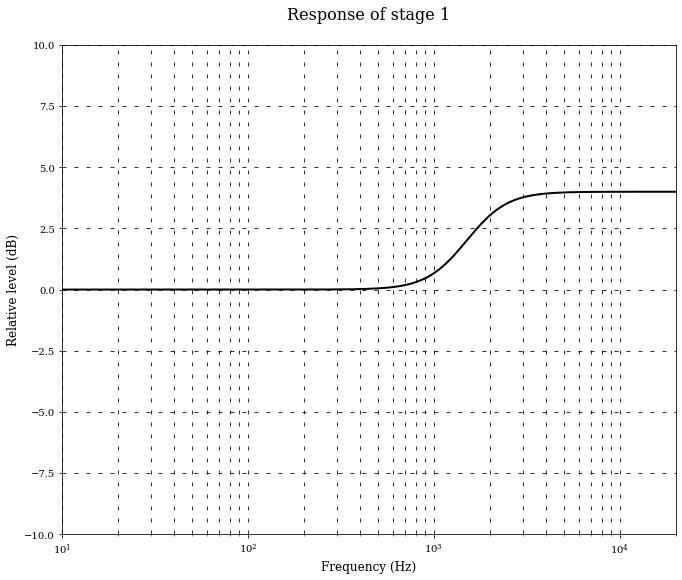

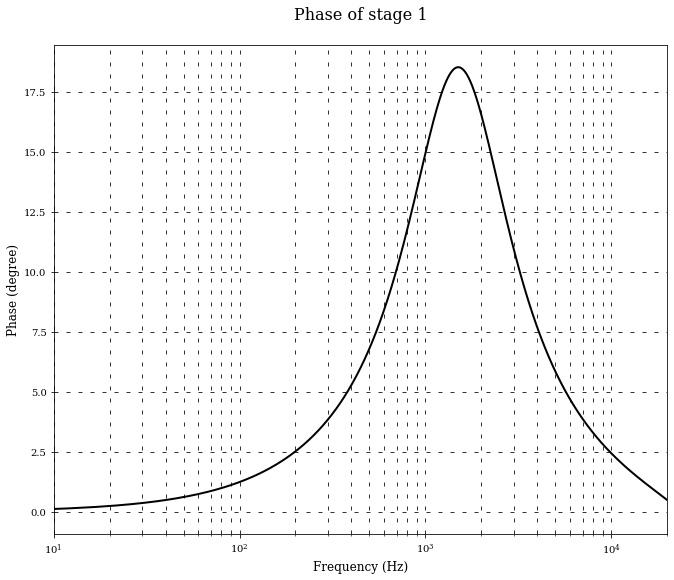

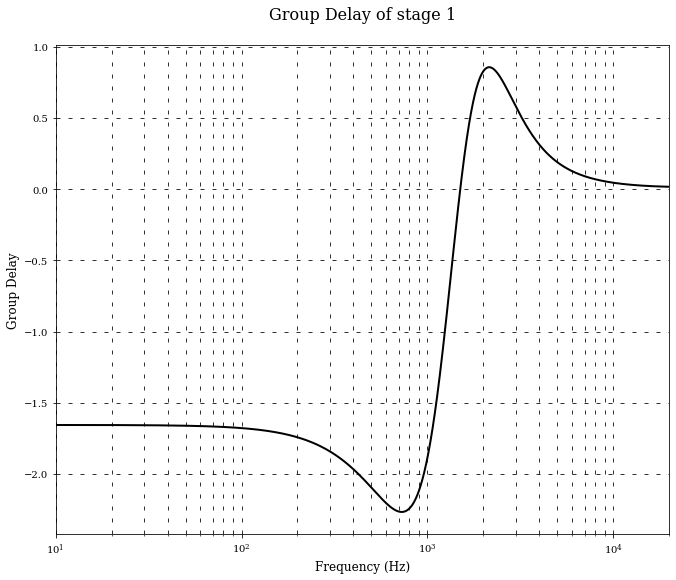

In [5]:
f_s = 48000
a1 = [1.0, -1.69065929318241, 0.73248077421585]
b1 = [1.53512485958697, -2.69169618940638, 1.19839281085285]
omega, H1 = ss.freqz(b1, a1, worN = 10000, fs = f_s)
plotMag(omega, H1, "Response of stage 1", xlim = [10, 20000], ylim = [-10, 10])
plotPhs(omega, H1, "Phase of stage 1", xlim = [10, 20000])
omega, gd1 = ss.group_delay((b1, a1), w = 10000, fs = f_s)
plotGD(omega, gd1, "Group Delay of stage 1", xlim = [10, 20000])

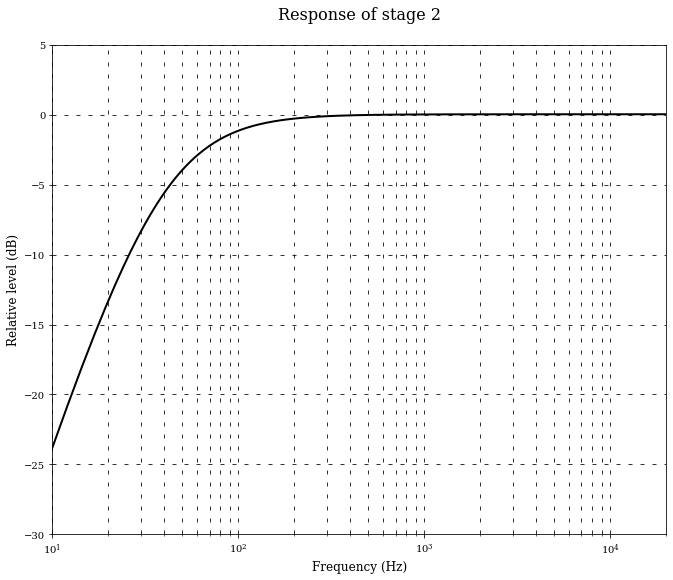

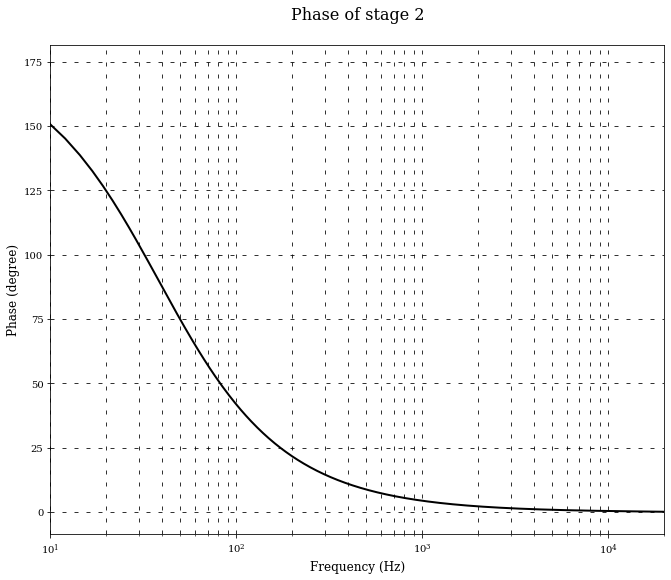

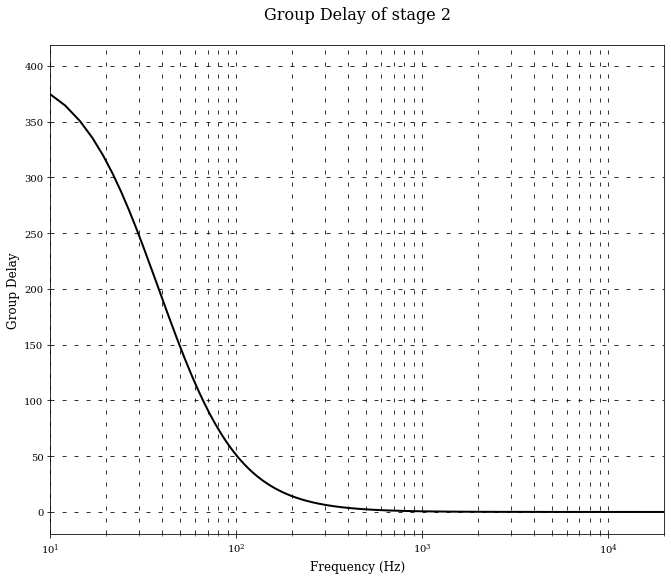

In [6]:
a2 = [1.0, -1.99004745483398, 0.99007225036621]
b2 = [1.0, -2.0, 1.0]
omega, H2 = ss.freqz(b2, a2, worN = 10000, fs = f_s)
plotMag(omega, H2, "Response of stage 2", xlim = [10, 20000], ylim = [-30, 5])
plotPhs(omega, H2, "Phase of stage 2", xlim = [10, 20000])
omega, gd2 = ss.group_delay((b2, a2), w = 10000, fs = f_s)
plotGD(omega, gd2, "Group Delay of stage 2", xlim = [10, 20000])

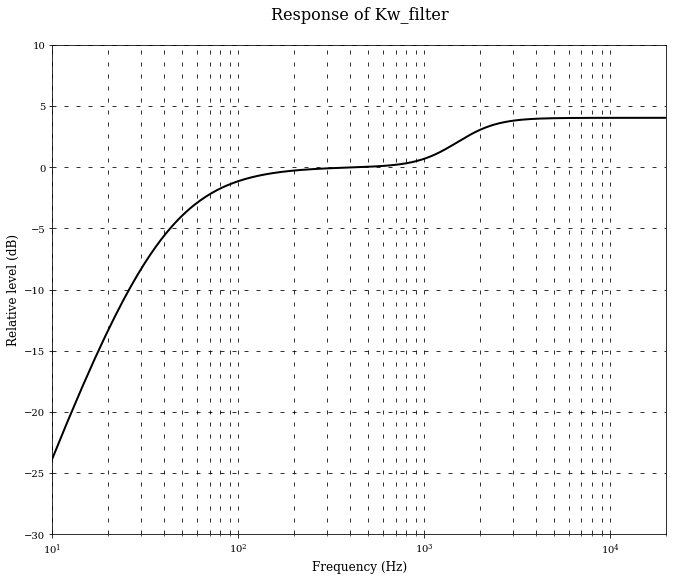

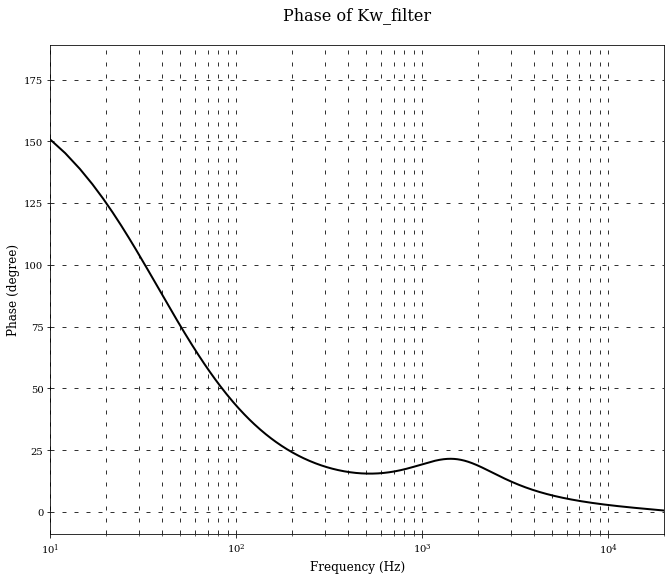

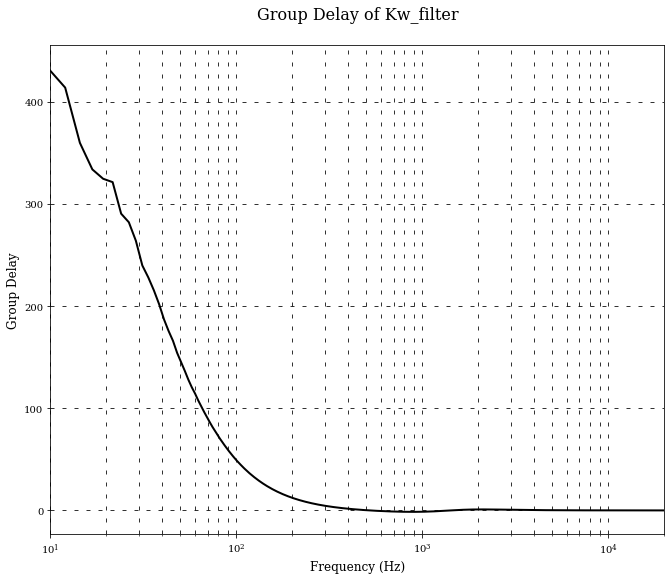

In [7]:
a_kfilter = np.convolve(a1, a2)
b_kfilter = np.convolve(b1, b2)
omega, H_kfilter = ss.freqz(b_kfilter, a_kfilter, worN = 10000, fs = f_s)
plotMag(omega, H_kfilter, "Response of Kw_filter", xlim = [10, 20000], ylim = [-30, 10])
plotPhs(omega, H_kfilter, "Phase of Kw_filter", xlim = [10, 20000])
omega, gd_kfilter = ss.group_delay((b_kfilter, a_kfilter), w = 10000, fs = f_s)
plotGD(omega, gd_kfilter, "Group Delay of Kw_filter", xlim = [10, 20000])

In [8]:
def second_order_root(a, b, c):
    D = complex(b**2 - 4*a*c)
    x = [((-b-np.sqrt(D))/2*a), ((-b+np.sqrt(D))/2*a)]
    return x

In [13]:
z1 = second_order_root(b1[0], b1[1], b1[2])
p1 = second_order_root(a1[0], a1[1], a1[2])

z2 = second_order_root(b2[0], b2[1], b2[2])
p2 = second_order_root(a2[0], a2[1], a2[2])

print(z1)
print(p1)
print(z2)
print(p2)

NameError: name 'second_order_root' is not defined

In [8]:
z1 = np.roots(b1)
p1 = np.roots(a1)
z2 = np.roots(b2)
p2 = np.roots(a2)

print(z1)
print(p1)
print(z2)
print(p2)

[0.87670269+0.10973068j 0.87670269-0.10973068j]
[0.84532965+0.13378551j 0.84532965-0.13378551j]
[1. 1.]
[0.99502373+0.00017956j 0.99502373-0.00017956j]


In [9]:
z_kfilter = np.roots(b_kfilter)
p_kfilter = np.roots(a_kfilter)

print(z_kfilter)
print(p_kfilter)

[1.00000023+0.j         0.99999977+0.j         0.87670269+0.10973068j
 0.87670269-0.10973068j]
[0.99502373+0.00017956j 0.99502373-0.00017956j 0.84532965+0.13378551j
 0.84532965-0.13378551j]


In [10]:
def ZPlane(z, p, title):
    figure, ax = plt.subplots(figsize = (5, 5))
    uc = plt.Circle((0, 0), 1, color = "black", fill = False)
    ax.add_patch(uc)
    
    plt.scatter(z.real, z.imag, label = "zero", marker = 'o', facecolors = "none", edgecolors='royalblue')
    plt.scatter(p.real, p.imag, label = "pole", marker = 'x', facecolors = "darkorange")
    plt.xlim([-1.2, 1.2])
    plt.ylim([-1.2, 1.2])
    plt.xlabel("$\mathfrak{Re}$")
    plt.ylabel("$\mathfrak{Im}$")
    plt.legend()
    
    plt.axhline(0, color = "black", linewidth = 1)
    plt.axvline(0, color = "black", linewidth = 1)
    plt.title(title)
    plt.savefig(title + ".pdf")
    plt.show()

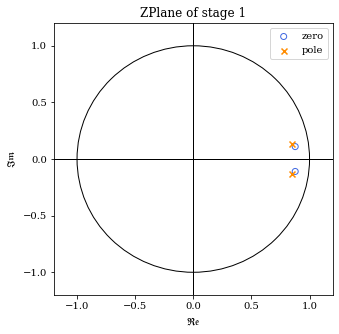

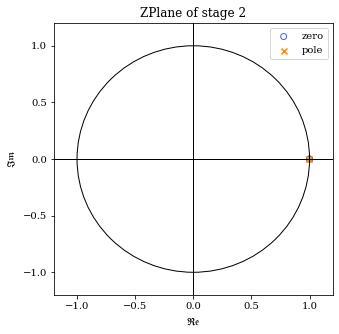

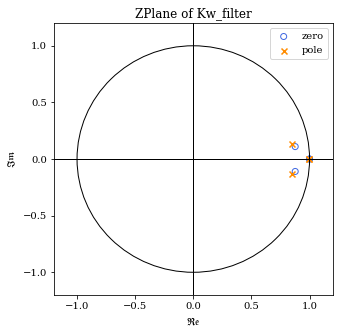

In [11]:
ZPlane(z1, p1, "ZPlane of stage 1")
ZPlane(z2, p2, "ZPlane of stage 2")
ZPlane(z_kfilter, p_kfilter, "ZPlane of Kw_filter")

In [12]:
print(b_kfilter)
print(a_kfilter)

[ 1.53512486 -5.76194591  8.11691005 -5.08848181  1.19839281]
[ 1.         -3.68070675  5.08704525 -3.13154635  0.72520889]


In [13]:
z_r = np.absolute(z_kfilter)
z_theta = np.angle(z_kfilter)
p_r = np.absolute(p_kfilter)
p_theta = np.angle(p_kfilter)

In [14]:
print(z_r, np.rad2deg(z_theta))
print(p_r, np.rad2deg(p_theta))

[1.00000023 0.99999977 0.88354311 0.88354311] [ 0.          0.          7.13420787 -7.13420787]
[0.99502374 0.99502374 0.85585091 0.85585091] [ 0.01033974 -0.01033974  8.99328517 -8.99328517]


In [15]:
z_freq = 48000.0 * z_theta / 20000.0
p_freq = 48000.0 * p_theta / 20000.0

z_new = []; p_new = []
for i in range(4):
    z_new.append((z_r[i]) * complex(np.cos(z_freq[i]), np.sin(z_freq[i])))
    p_new.append((p_r[i]) * complex(np.cos(p_freq[i]), np.sin(p_freq[i])))
z_new = np.array(z_new); p_new = np.array(p_new)

In [16]:
print(np.rad2deg(z_freq))
print(np.rad2deg(p_freq))
print(z_new)
print(p_new)

[  0.           0.          17.12209889 -17.12209889]
[  0.02481537  -0.02481537  21.58388441 -21.58388441]
[1.00000023+0.j       0.99999977+0.j       0.84438407+0.260123j
 0.84438407-0.260123j]
[0.99502365+0.00043095j 0.99502365-0.00043095j 0.79583863+0.3148359j
 0.79583863-0.3148359j ]


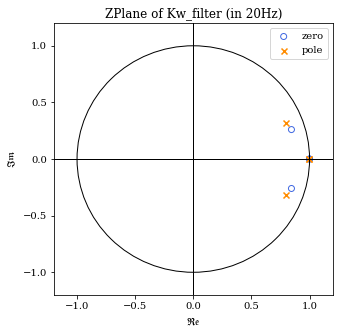

In [17]:
ZPlane(z_new, p_new, "ZPlane of Kw_filter (in 20Hz)")

In [18]:
from sympy import *
from IPython.display import Math

In [19]:
z = Symbol('z')
Y_new = S(1); X_new = S(1)
for i in range(4):
    Y_new = Y_new * (z-z_new[i])
    X_new = X_new * (z-p_new[i])

Y_new = Y_new.expand()
X_new = X_new.expand()
H_new = (Y_new / X_new).simplify()

display(Math("Y(z) = "+latex(Y_new.expand())))
display(Math("X(z) = "+latex(X_new.expand())))
display(Math("H(z) = "+latex(H_new)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [20]:
print(Poly(Y_new).coeffs())
print(Poly(X_new).coeffs())

[1.00000000000000, -3.68876813577454, 5.15818470113370, -3.25006499494377, 0.780648429584600]
[1.00000000000000, -3.58172456808702, 4.89006607417582, -3.03354688155039, 0.725208888477869]


In [21]:
b_new = []; a_new = []
for i, j in zip(Poly(Y_new).coeffs(), Poly(X_new).coeffs()):
    b_new.append(float(i)); a_new.append(float(j))
print(b_new)
print(a_new)

[1.0, -3.688768135774538, 5.158184701133702, -3.250064994943768, 0.7806484295845998]
[1.0, -3.5817245680870187, 4.890066074175821, -3.033546881550394, 0.725208888477869]


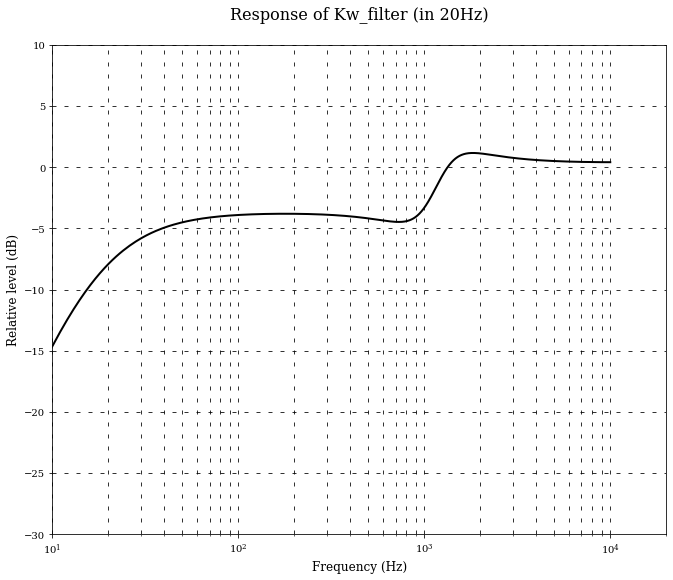

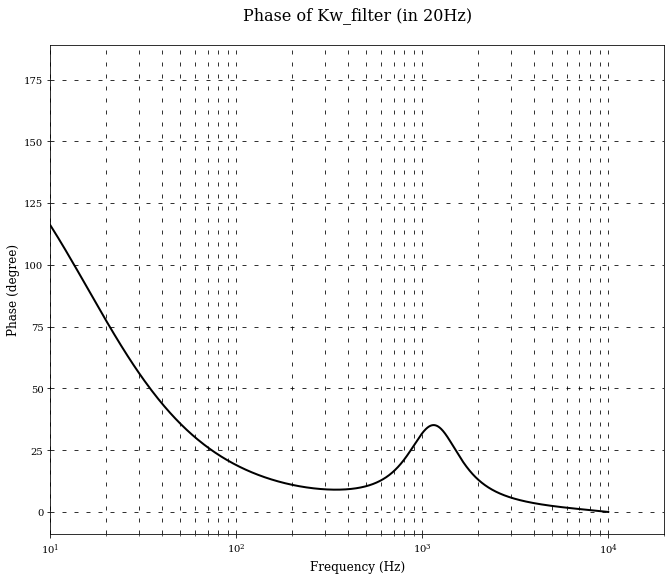

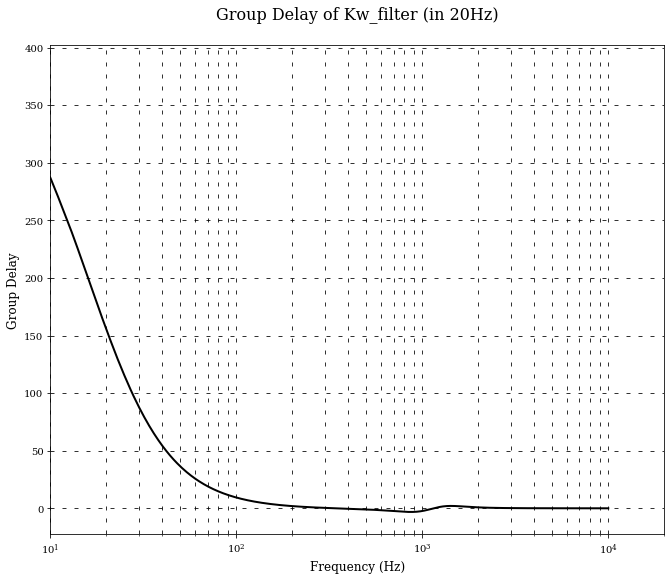

In [22]:
f_s_new = 20000
omega_new, H_new = ss.freqz(b_new, a_new, worN = 10000, fs = f_s_new)
plotMag(omega_new, H_new, "Response of Kw_filter (in 20Hz)", xlim = [10, 20000], ylim = [-30, 10])
plotPhs(omega_new, H_new, "Phase of Kw_filter (in 20Hz)", xlim = [10, 20000])
omega_new, gd__new = ss.group_delay((b_new, a_new), w = 10000, fs = f_s_new)
plotGD(omega_new, gd__new, "Group Delay of Kw_filter (in 20Hz)", xlim = [10, 20000])

In [25]:
#x-linear scale
def lin_plotMag(omega, H, title, xlim, ylim):
    plt.figure(figsize = (11,9))
    H_db = H_db = 20*np.log10(np.abs(H))
    plt.plot(omega, H_db, color = "black", linewidth = 2)
    plt.xlim(xlim)
    plt.xlabel("Frequency (Hz)", fontsize = 12)
    plt.ylim(ylim)
    plt.ylabel("Relative level (dB)", fontsize = 12)
    plt.grid(True, which = "both", color = "black", linestyle = (0, (5, 10)))
    plt.title(title + '\n', fontsize = 16)
    #plt.savefig(title + ".pdf")
    plt.show()

def lin_plotPhs(omega, H, title, xlim):
    plt.figure(figsize = (11,9))
    H_ph = np.rad2deg(np.unwrap(np.angle(H)))
    plt.plot(omega, H_ph, color = "black", linewidth = 2)
    plt.xlim(xlim)
    plt.xlabel("Frequency (Hz)", fontsize = 12)
    plt.ylabel("Phase (degree)", fontsize = 12)
    plt.grid(True, which = "both", color = "black", linestyle = (0, (5, 10)))
    plt.title(title + '\n', fontsize = 16)
    #plt.savefig(title + ".pdf")
    plt.show()    
    
def lin_plotGD(omega, gd, title, xlim):
    plt.figure(figsize = (11,9))
    plt.plot(omega, gd, color = "black", linewidth = 2)
    plt.xlim(xlim)
    plt.xlabel("Frequency (Hz)", fontsize = 12)
    plt.ylabel("Group Delay", fontsize = 12)
    plt.grid(True, which = "both", color = "black", linestyle = (0, (5, 10)))
    plt.title(title + '\n', fontsize = 16)
    #plt.savefig(title + ".pdf")
    plt.show()

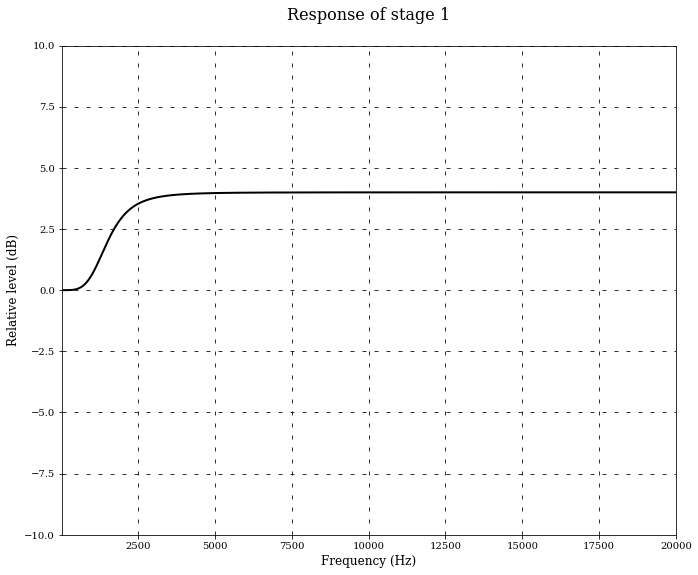

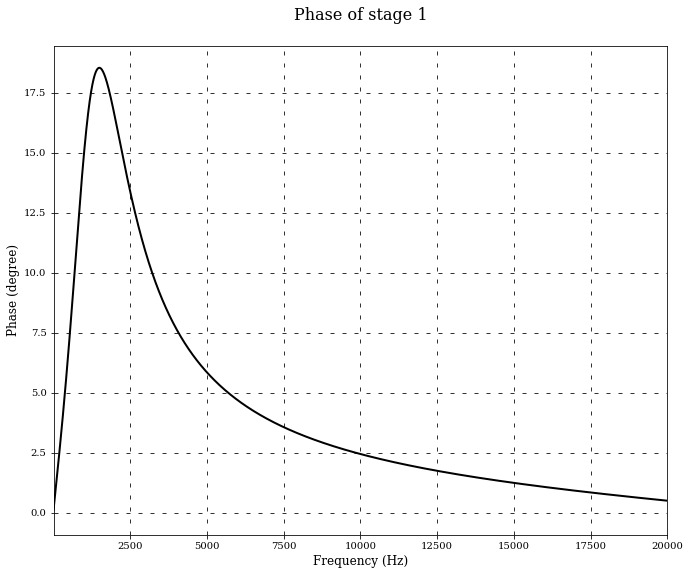

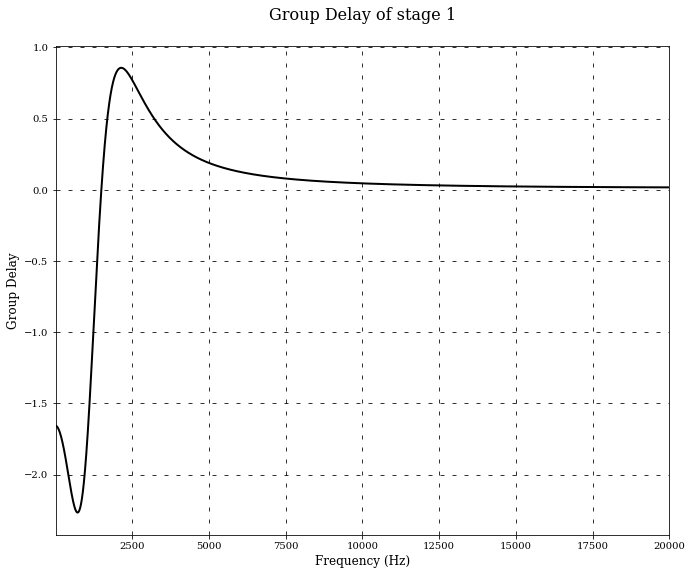

In [26]:
lin_plotMag(omega, H1, "Response of stage 1", xlim = [10, 20000], ylim = [-10, 10])
lin_plotPhs(omega, H1, "Phase of stage 1", xlim = [10, 20000])
lin_plotGD(omega, gd1, "Group Delay of stage 1", xlim = [10, 20000])

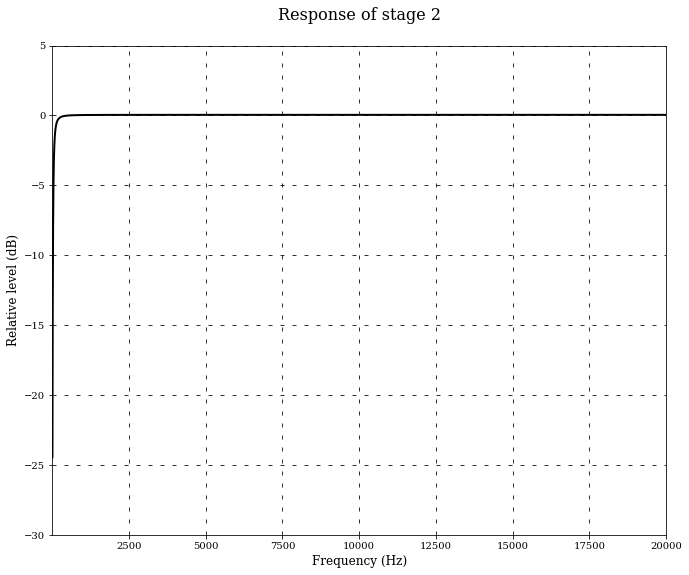

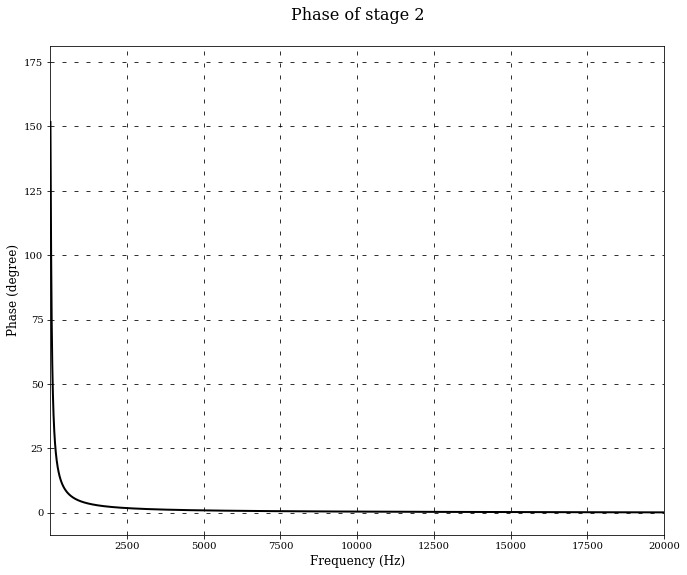

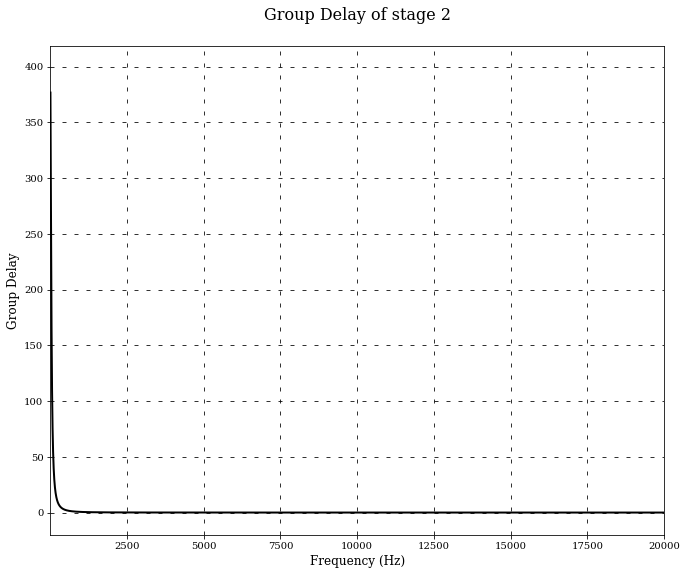

In [27]:
lin_plotMag(omega, H2, "Response of stage 2", xlim = [10, 20000], ylim = [-30, 5])
lin_plotPhs(omega, H2, "Phase of stage 2", xlim = [10, 20000])
lin_plotGD(omega, gd2, "Group Delay of stage 2", xlim = [10, 20000])

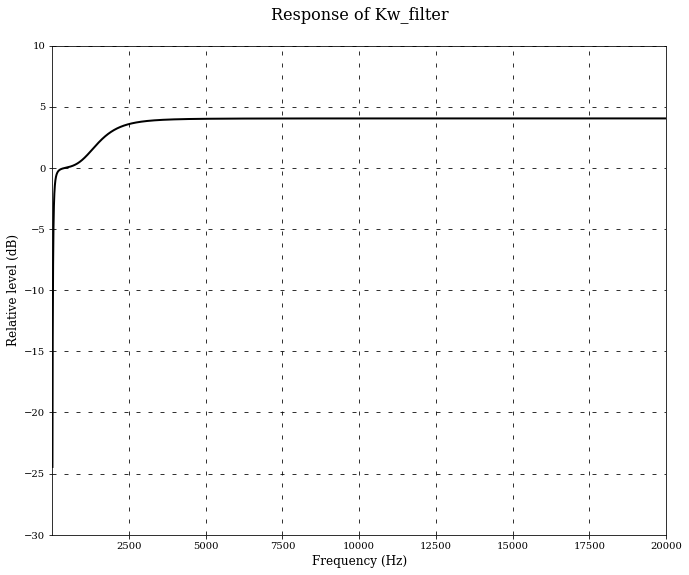

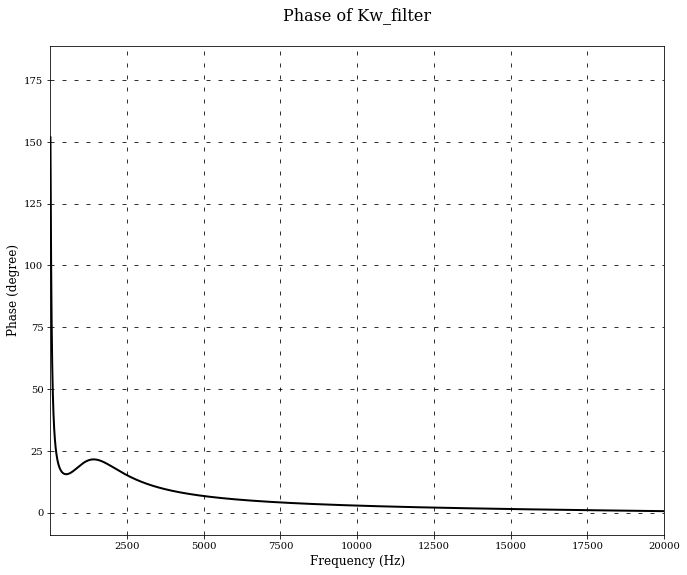

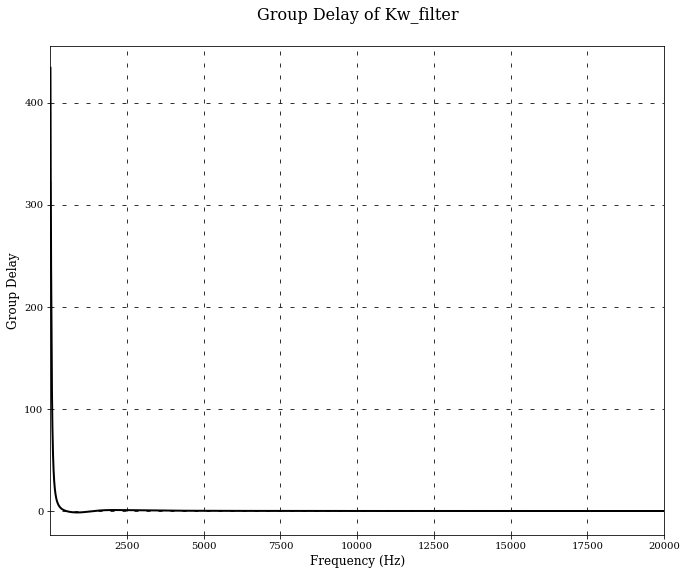

In [28]:
lin_plotMag(omega, H_kfilter, "Response of Kw_filter", xlim = [10, 20000], ylim = [-30, 10])
lin_plotPhs(omega, H_kfilter, "Phase of Kw_filter", xlim = [10, 20000])
lin_plotGD(omega, gd_kfilter, "Group Delay of Kw_filter", xlim = [10, 20000])